# Project 1 : Test a Perceptual Phenomenon


In this project, we will use descriptive statistics and a statistical test to analyze the Stroop effect, a classic result of experimental psychology.

First of all, let's import some packages which will be used latter.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### 1. What is our independent variable? What is our dependent variable?

The independent variable is the kind of conditions: a congruent words condition, and an incongruent words condition. 

The dependent variable is the time it takes to name the ink colors in equally-sized lists. 

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We assume that the incongruent words condition may interference one's reaction time, which means people will take more time to read the incongruent words. This is a one side hypotheses test. 

The **null hypothesis** is that the reaction time of incongruent words condition is no longer than that of congruent words condition.

The **alternative hypothesis** is that the reaction time is longer than that of congruent words condition.

If we note $\mu_1$ as the population mean of reaction time in  congruent words condition, while $\mu_2$ as the population mean of reaction time in the incongruent words condition, then we can express the hypothese as follows:
$$
H_0: \mu_2 - \mu_1 <= 0 \\
H_A: \mu_2 - \mu_1 > 0
$$

We will perform **t-Test** for three reasons.
1. We are going to study the difference of two dependent sample means and do not know the population mean and standard deviation.
2. The sample size is small (n=24).
3. We assume the population data to be approximately normally distributed.(We guess this from the sample histogram bellow.)

We assume the $\alpha$ level of this t-Test is 1%, and this is a one-tailed test.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Before calculating some statistics, we should read the data to a dataframe.

In [2]:
df = pd.read_csv('stroopdata.csv')

Then we calculate some descriptive statistics about central tendency and variability.

**mean:**

In [ ]:
print "The mean time of congruent group is %.2fs" % df.Congruent.mean()
print "The mean time of incongruent group is %.2fs" % df.Incongruent.mean()

** median:**

In [4]:
print "The median time of congruent group is %.2fs" % df.Congruent.median()
print "The median time of incongruent group is %.2fs" % df.Incongruent.median()

The median time of congruent group is 14.36s
The median time of incongruent group is 21.02s


**Variance:**

In [5]:
print "The variance of congruent group is %.2f" % df.Congruent.var()
print "The variance of incongruent group is %.2f" % df.Incongruent.var()

The variance of congruent group is 12.67
The variance of incongruent group is 23.01


** sample standard deviation:**

In [6]:
print "The sample standard deviation of congruent group is %.2f" % df.Congruent.std()
print "The sample standard deviation of incongruent group is %.2f" % df.Incongruent.std()

The sample standard deviation of congruent group is 3.56
The sample standard deviation of incongruent group is 4.80


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

** historgrams **

We first plot histograms for these two groups. From the plots shown below, we can see that the mode of congruent group is 12-14, while the mode of incongruent group is 20-22. 


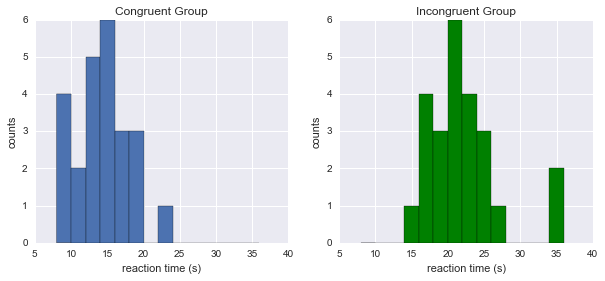

In [7]:
bins = range(8,37,2)
fig = plt.figure(figsize=(10, 4))

p1 = fig.add_subplot(121)
plt.hist(df.Congruent, bins=bins)
plt.title('Congruent Group')
plt.xlabel('reaction time (s)')
plt.ylabel('counts')

p2 = fig.add_subplot(122)
plt.hist(df.Incongruent, bins=bins, color = 'green')
plt.title('Incongruent Group')
plt.xlabel('reaction time (s)')
plt.ylabel('counts')

plt.show()

** box plots **

The flowing figures are box plots, which show clearly that the incongruent group takes more time than the congruent group. we can also see that there are two outliers in the incongruent group.

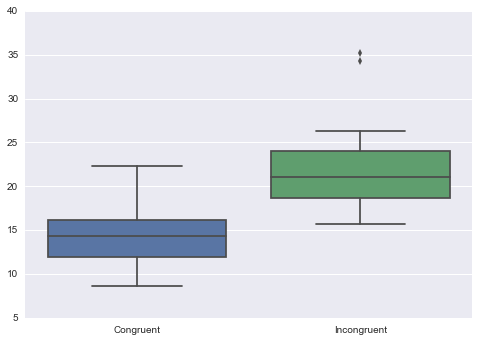

In [8]:
_ = sns.boxplot(data=df)

** Empirical cumulative distribution function (ECDF) **

The above two kinds of plots can not show all points in one figure, so we plot ECDF. From the ECDF we find that there is a significant sign that the reaction time of incongruent group is longer than that of congruent group.

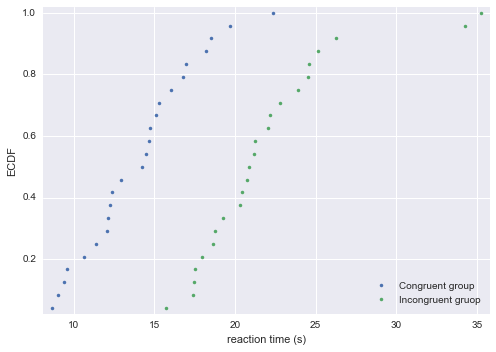

In [9]:
# Making an ECDF 
def plot_ecdf(data, label=''):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / float(len(x))
    plt.plot(x, y, marker='.', linestyle='none', label=label)
    plt.margins(0.02)
    
plot_ecdf(df.Congruent, label='Congruent group')
plot_ecdf(df.Incongruent, label='Incongruent gruop')
plt.xlabel('reaction time (s)')
plt.ylabel('ECDF')
plt.legend(loc = 'lower right')
plt.show()

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We assume the ** $\alpha$ level is 1% **, and it's a one-side test. The **t critical value is 2.50 ** wihch can be calculated as follows.

The degree of freedom is 23.

In [10]:
degree = len(df) -1
degree

23

calculating t critical value:

In [11]:
stats.t.isf(0.01, degree)

2.4998667394943985

Then we use `scipy.stats.ttest_rel` function to get the t statistic and p value of these two dependent samples.

In [12]:
t_stats, p_value = stats.ttest_rel(df.Incongruent, df.Congruent)
print "t statistic is %.2f" % t_stats
print "p value is %.10f" % p_value

t statistic is 8.02
p value is 0.0000000410


We can also make the same calculation by hand.

In [13]:
diff = df.Incongruent - df.Congruent
t_stats = diff.mean() / (diff.std() / np.sqrt(len(diff)))
t_stats

8.020706944109957

From the above calculation, **t statistic is 8.02** and **p value is 0.000000041**. 

Since t statistic is larger than t critical value (also p value is smaller than $\alpha$ level), we can **reject** the null hypothesis. 

The **conclusion** is that the reaction of Incongruent word condition is longer than that of the congruent word condition, which matches up our expectation that the incongruent words condition may interference one's reaction time.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


From [wikipedian](https://en.wikipedia.org/wiki/Stroop_effect), I find following theories used to explain the Stroop effect.

- Processing speed
- Selective attention
- Automaticity
- Parallel distributed processing

However, I have another idea to explain this effect. I think the confliction in words' meanings makes one's brain react slowly. According to this assumption, I design a experiment: There are two groups, people in the first group act as what they are told, that is when the command is "turn left", they turn left; while people in the second group act as the opposite of the command, that is when the command is "turn left", they must turn right. We measure their reaction time to see if the second group takes more time to react.